## This is a preliminary example how to work with daemonflux

1. Install daemonflux:
    - Clone the git repository `git clone https://github.com/mceq-project/daemonflux`
    - `cd ..`
    - `pip install -e .` (in editable mode, so the package gets updated after each `git pull`)
2. Get some splines (now from Slack)
3. Follow this script, and send feedback about the interface on github or Slack

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from daemonflux import Flux

In [3]:
# Point to the files
fl_ic = Flux('../daemonsplines_generic_20230207.pkl', cal_file='../daemonflux_calibration_20230207_v2.pkl', use_calibration=True, debug=1)
fl_ic_nc = Flux('../daemonsplines_generic_20230207.pkl', cal_file='../daemonflux_calibration_20230207_v2.pkl', use_calibration=False, debug=1)

daemonflux calibration not used.


In [4]:
egrid = np.logspace(0,8)
print(fl_ic.zenith_angles)

['0.0000', '18.1949', '25.8419', '31.7883', '36.8699', '41.4096', '45.5730', '49.4584', '53.1301', '56.6330', '60.0000', '63.2563', '66.4218', '69.5127', '72.5424', '75.5225', '78.4630', '81.3731', '84.2608', '87.1340', '90.0000']


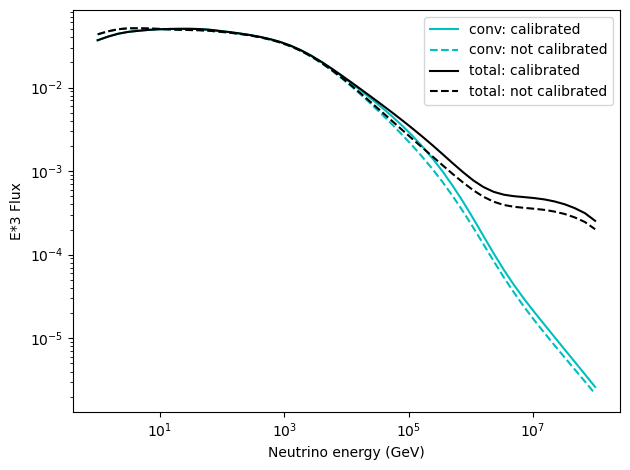

In [5]:
plt.figure()
plt.loglog(egrid, fl_ic.flux(egrid, '60.0000', 'numuflux'), color='c', label='conv: calibrated')
plt.loglog(egrid, fl_ic_nc.flux(egrid, '60.0000', 'numuflux'), color='c', ls ='--', label='conv: not calibrated')
plt.loglog(egrid, fl_ic.flux(egrid, '60.0000', 'total_numuflux'), color='k', label='total: calibrated')
plt.loglog(egrid, fl_ic_nc.flux(egrid, '60.0000', 'total_numuflux'), color='k', ls ='--', label='total: not calibrated')
plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('E*3 Flux')
plt.legend()
plt.tight_layout()


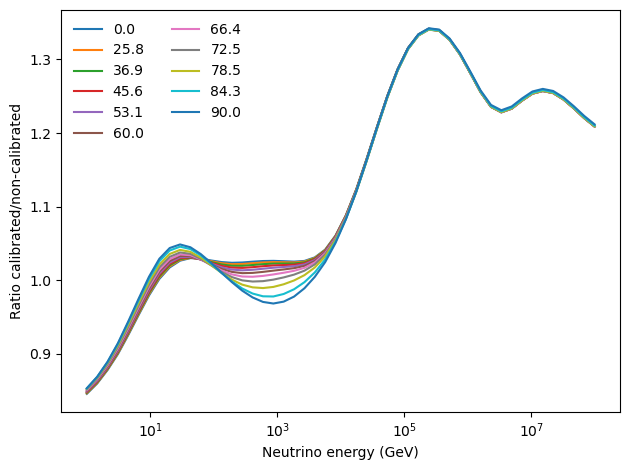

In [6]:
plt.figure()
# Compare calibrated vs non-calibrated for each zenith angle
for zen in sorted([float(z) for z in fl_ic.zenith_angles])[::2]:
    plt.semilogx(egrid, fl_ic.flux(egrid, zen, 'numuflux')/fl_ic_nc.flux(egrid, zen, 'numuflux'), label=f"{zen:3.1f}")
plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('Ratio calibrated/non-calibrated')
plt.legend(frameon=False, ncol=2)
plt.tight_layout()


In [7]:
# These are the knobs
fl_ic.params.known_parameters

['K+_158G',
 'K+_2P',
 'K+_31G',
 'K-_158G',
 'K-_2P',
 'K-_31G',
 'n_158G',
 'n_2P',
 'p_158G',
 'p_2P',
 'pi+_158G',
 'pi+_20T',
 'pi+_2P',
 'pi+_31G',
 'pi-_158G',
 'pi-_20T',
 'pi-_2P',
 'pi-_31G',
 'GSF_1',
 'GSF_2',
 'GSF_3',
 'GSF_4',
 'GSF_5',
 'GSF_6']

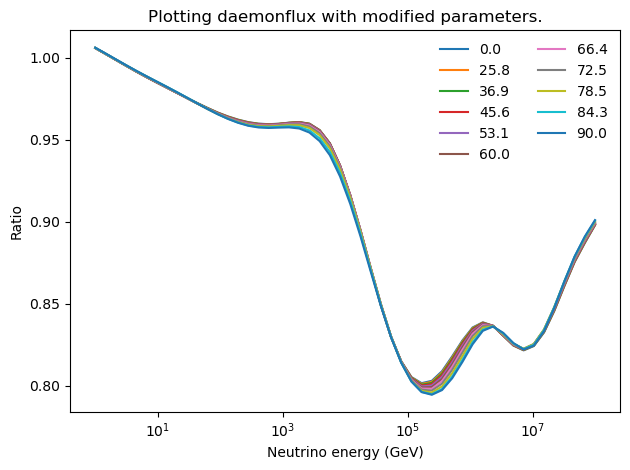

In [8]:
# How to modify tuning parameters
plt.figure()
plt.title("Plotting daemonflux with modified parameters.")
for zen in sorted([float(z) for z in fl_ic.zenith_angles])[::2]:
    plt.semilogx(egrid, fl_ic.flux(egrid, zen, 'total_numuflux', params={'GSF_1': -1, 'GSF_5': 2})/fl_ic.flux(egrid, zen, 'total_numuflux'), label=f"{zen:3.1f}")
plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('Ratio')
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

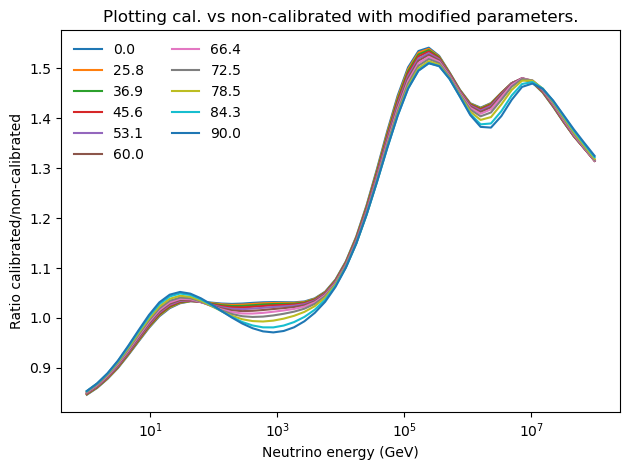

In [9]:
# How to modify tuning parameters
plt.figure()
plt.title("Plotting cal. vs non-calibrated with modified parameters.")
for zen in sorted([float(z) for z in fl_ic.zenith_angles])[::2]:
    plt.semilogx(egrid, fl_ic.flux(egrid, zen, 'total_numuflux', params={'GSF_1': -1, 'GSF_5': 2})/fl_ic_nc.flux(egrid, zen, 'total_numuflux', params={'GSF_1': -1, 'GSF_5': 2}), label=f"{zen:3.1f}")
plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('Ratio calibrated/non-calibrated')
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

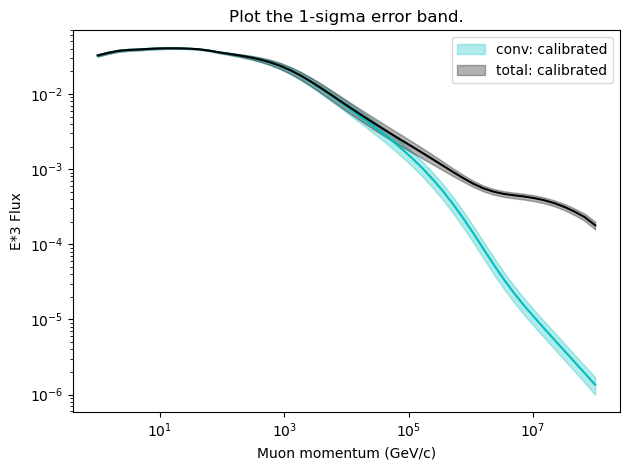

In [10]:
plt.figure()
plt.title("Plot the 1-sigma error band.")
fl = fl_ic.flux(egrid, '15', 'numuflux')
err = fl_ic.error(egrid, '15', 'numuflux')
plt.loglog(egrid, fl, color='c')
plt.fill_between(egrid, fl + err, fl - err, color='c', alpha=.3, label='conv: calibrated')

fl = fl_ic.flux(egrid, '15', 'total_numuflux')
err = fl_ic.error(egrid, '15', 'total_numuflux')
plt.loglog(egrid, fl, color='k')
plt.fill_between(egrid, fl + err, fl - err, color='k', alpha=.3, label='total: calibrated')

plt.xlabel('Muon momentum (GeV/c)')
plt.ylabel('E*3 Flux')
plt.legend()
plt.tight_layout()


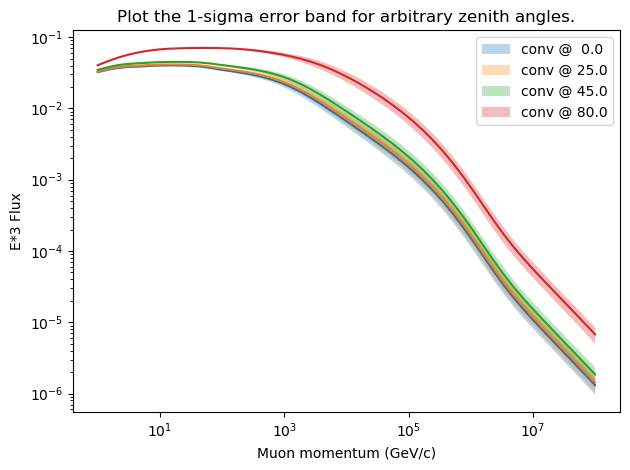

In [11]:
# Plot for arbitrary zenith angles
zeniths = [0., 25, "45", "80"]
plt.figure()
plt.title("Plot the 1-sigma error band for arbitrary zenith angles.")
for zen in zeniths:
    fl = fl_ic.flux(egrid, zen, 'numuflux')
    err = fl_ic.error(egrid, zen, 'numuflux')
    plt.loglog(egrid, fl)
    plt.fill_between(egrid, fl + err, fl - err, alpha=.3, label=f'conv @ {float(zen):4.1f}')

plt.xlabel('Muon momentum (GeV/c)')
plt.ylabel('E*3 Flux')
plt.legend()
plt.tight_layout()

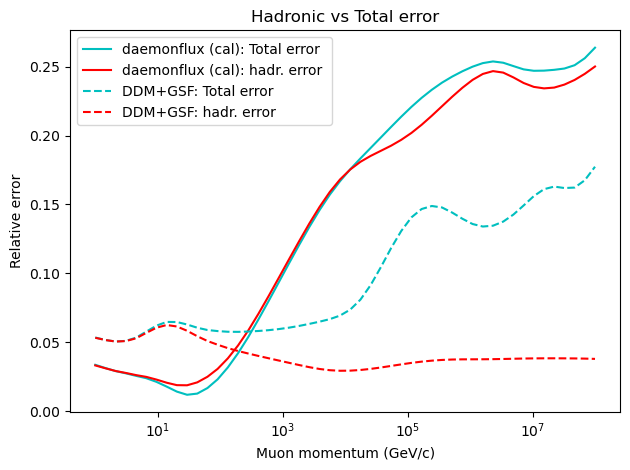

In [12]:
plt.figure()
plt.title("Hadronic vs Total error")
fl = fl_ic.flux(egrid, '15', 'numuflux')
err_total = fl_ic.error(egrid, '15', 'numuflux')
err_hadronic = fl_ic.error(egrid, '15', 'numuflux', only_hadronic=True)
plt.semilogx(egrid, err_total/fl, color='c', label='daemonflux (cal): Total error ')
plt.semilogx(egrid, err_hadronic/fl, color='r', label='daemonflux (cal): hadr. error ')
fl = fl_ic_nc.flux(egrid, '15', 'numuflux')
err_total = fl_ic_nc.error(egrid, '15', 'numuflux')
err_hadronic = fl_ic_nc.error(egrid, '15', 'numuflux', only_hadronic=True)
plt.semilogx(egrid, err_total/fl, color='c', ls='--', label='DDM+GSF: Total error ')
plt.semilogx(egrid, err_hadronic/fl, color='r',ls='--', label='DDM+GSF: hadr. error ')


plt.xlabel('Muon momentum (GeV/c)')
plt.ylabel('Relative error')
plt.legend()
plt.tight_layout()
